# Testagem e métricas de modelos
Documento referente ao item 4.4 da documentação (modelagem)



# Manipulação ⚙


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns

Mounted at /content/drive


In [ ]:
# visualização da tabela de features construída anteriormente  
df = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/all.csv', usecols = ['ID', 'ORDERS_DONE', 'ORDERS_CANCEL', 'CANCELS_OPS_RT', 'AUTO_ACEITE', 'STOREKEEPER_YEAR'])
df.head() 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,ORDERS_DONE,ORDERS_CANCEL,CANCELS_OPS_RT,AUTO_ACEITE,STOREKEEPER_YEAR
0,32818,3.0,0.0,0.0,True,34.0
1,33051,2311.0,49.0,2.0,True,24.0
2,33052,0.0,2.0,1.0,True,24.0
3,33161,2625.0,55.0,4.0,True,28.0
4,33188,12.0,1.0,0.0,False,23.0


In [ ]:
# visualização da tabela de features proveniente de derivação de dados 
df_derivados = pd.read_csv('/content/drive/Shareddrives/Grupo Rappitendeiros/arthur.csv')
df_derivados.head()

,Unnamed: 0,ID,CHURN,IS_ACTIVE,CHURN_VALUE,DAILY_HOURS,DAILY_ORDERS,MONTHLY_EARNINGS,MONTHLY_TIPS,HOURLY_MONEY,MONEY_PER_ORDER,DISTANCE_PER_ORDER,DAILY_DISTANCE,MONEY_PER_DISTANCE
0,0,1286316,True,True,3,3.995590,7.640449,1848.040000,326.571429,18.141764,8.062527,3.446071,26.329531,2.339629
1,3,1036587,True,True,3,7.989556,16.000000,672.120000,127.666667,3.336801,1.400250,3.386037,54.176596,0.413537
2,4,106854,True,True,3,0.583576,0.750000,46.710000,23.666667,4.019849,2.076000,2.870784,2.153088,0.723147
3,5,359949,True,True,3,5.628855,3.118577,876.111667,103.583333,5.801624,9.364438,3.455666,10.776761,2.709879
4,6,64922,True,True,3,1.774453,1.121212,264.054000,82.600000,6.511942,7.850254,3.383588,3.793720,2.320098


In [ ]:
# substituição dos valores booleanos para numéricos na coluna 'CHURN'
df_derivados = df_derivados.replace({'CHURN':{True:1, False:0}}) 
# e na coluna 'AUTO_ACEITE'
df = df.replace({'AUTO_ACEITE':{True:1, False:0}}) 

In [ ]:
# junção das tabelas para features utilizando o ID como join key
df_features = pd.merge(df_derivados, df, how='inner', left_on='ID', right_on='ID')
df_features.head()

,Unnamed: 0,ID,CHURN,IS_ACTIVE,CHURN_VALUE,DAILY_HOURS,DAILY_ORDERS,MONTHLY_EARNINGS,MONTHLY_TIPS,HOURLY_MONEY,MONEY_PER_ORDER,DISTANCE_PER_ORDER,DAILY_DISTANCE,MONEY_PER_DISTANCE,ORDERS_DONE,ORDERS_CANCEL,CANCELS_OPS_RT,AUTO_ACEITE,STOREKEEPER_YEAR
0,0,1286316,1,True,3,3.995590,7.640449,1848.040000,326.571429,18.141764,8.062527,3.446071,26.329531,2.339629,1042.0,40.0,9.0,1.0,22.0
1,3,1036587,1,True,3,7.989556,16.000000,672.120000,127.666667,3.336801,1.400250,3.386037,54.176596,0.413537,179.0,8.0,3.0,0.0,25.0
2,4,106854,1,True,3,0.583576,0.750000,46.710000,23.666667,4.019849,2.076000,2.870784,2.153088,0.723147,123.0,8.0,1.0,0.0,44.0
3,5,359949,1,True,3,5.628855,3.118577,876.111667,103.583333,5.801624,9.364438,3.455666,10.776761,2.709879,939.0,98.0,37.0,1.0,25.0
4,6,64922,1,True,3,1.774453,1.121212,264.054000,82.600000,6.511942,7.850254,3.383588,3.793720,2.320098,117.0,2.0,0.0,1.0,39.0


In [ ]:
# quantidade de RTs na tabela 
len(df_features)

160621

In [ ]:
# remoção dos nulos
df_features = df_features.dropna()

In [ ]:
# verificação de números infinitos por coluna 
df_features.isin([np.inf, -np.inf]).sum()

Unnamed: 0               0
ID                       0
CHURN                    0
IS_ACTIVE                0
CHURN_VALUE              0
DAILY_HOURS              0
DAILY_ORDERS             0
MONTHLY_EARNINGS         0
MONTHLY_TIPS             0
HOURLY_MONEY             1
MONEY_PER_ORDER       7264
DISTANCE_PER_ORDER       0
DAILY_DISTANCE           0
MONEY_PER_DISTANCE    7280
ORDERS_DONE              0
ORDERS_CANCEL            0
CANCELS_OPS_RT           0
AUTO_ACEITE              0
STOREKEEPER_YEAR         0
dtype: int64

In [ ]:
# substituição dos valores np.inf para NaN
df_features = df_features.replace({'MONEY_PER_ORDER':{np.inf:np.nan}, 'MONEY_PER_DISTANCE':{np.inf:np.nan}, 'HOURLY_MONEY':{np.inf:np.nan}})
# drop nos valores NaN 
df_features = df_features.dropna()


In [ ]:
# verificação
df_features.isin([np.inf, -np.inf]).sum()

Unnamed: 0            0
ID                    0
CHURN                 0
IS_ACTIVE             0
CHURN_VALUE           0
DAILY_HOURS           0
DAILY_ORDERS          0
MONTHLY_EARNINGS      0
MONTHLY_TIPS          0
HOURLY_MONEY          0
MONEY_PER_ORDER       0
DISTANCE_PER_ORDER    0
DAILY_DISTANCE        0
MONEY_PER_DISTANCE    0
ORDERS_DONE           0
ORDERS_CANCEL         0
CANCELS_OPS_RT        0
AUTO_ACEITE           0
STOREKEEPER_YEAR      0
dtype: int64

In [ ]:
# verificação de valores nulos em cada coluna
df_features.isna().sum()

Unnamed: 0            0
ID                    0
CHURN                 0
IS_ACTIVE             0
CHURN_VALUE           0
DAILY_HOURS           0
DAILY_ORDERS          0
MONTHLY_EARNINGS      0
MONTHLY_TIPS          0
HOURLY_MONEY          0
MONEY_PER_ORDER       0
DISTANCE_PER_ORDER    0
DAILY_DISTANCE        0
MONEY_PER_DISTANCE    0
ORDERS_DONE           0
ORDERS_CANCEL         0
CANCELS_OPS_RT        0
AUTO_ACEITE           0
STOREKEEPER_YEAR      0
dtype: int64

In [ ]:
# verifica se existem números menores que 0 nas colunas 
df_features.lt(0).sum()

Unnamed: 0            0
ID                    0
CHURN                 0
IS_ACTIVE             0
CHURN_VALUE           0
DAILY_HOURS           0
DAILY_ORDERS          0
MONTHLY_EARNINGS      0
MONTHLY_TIPS          0
HOURLY_MONEY          0
MONEY_PER_ORDER       0
DISTANCE_PER_ORDER    0
DAILY_DISTANCE        0
MONEY_PER_DISTANCE    0
ORDERS_DONE           0
ORDERS_CANCEL         0
CANCELS_OPS_RT        0
AUTO_ACEITE           0
STOREKEEPER_YEAR      7
dtype: int64

# Separação de dados para teste e treino 👩‍💻

In [ ]:
# definição de x e y para treinamento e testagem dos modelos
x = df_features[['MONTHLY_EARNINGS', 'DISTANCE_PER_ORDER', 'ORDERS_DONE', 'ORDERS_CANCEL', 'CANCELS_OPS_RT', 'AUTO_ACEITE']]
y = df_features['CHURN']

# separação dos dados entre teste e treino
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3) #split = separação entre teste e treino

# checagem se precisamos realizar rebalanceamento dos dados

print(y_train.value_counts())

1    78024
0    21115
Name: CHURN, dtype: int64


In [ ]:
# rebalanceamento undersampling dos dados x y de treino

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print(y_resampled.value_counts())

0    21115
1    21115
Name: CHURN, dtype: int64


In [ ]:
def metricas(modelo):
  from sklearn.metrics import recall_score, precision_score, f1_score
  print('Acuracidade (treino): ', modelo.score(x_train, y_train))
  print('Acuracidade (teste): ', modelo.score(x_test, y_test))
  print('Revocação: ', recall_score(y_test, y_pred))
  print('Precisão: ', precision_score(y_test, y_pred))
  print('F1_score: ', f1_score(y_test, y_pred))


# Modelos 🤖

In [ ]:
# importação das bibliotecas necessárias

# modelo de classificação K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
# modelo de classificação Decision Tree
from sklearn.tree import DecisionTreeClassifier
# modelo de classificação Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# modelo de classificação Random Forest
from sklearn.ensemble import RandomForestClassifier
# modelo de classificação de Regressão Logística
from sklearn.linear_model import LogisticRegression
# modelo de classificação Support Vector Machine
from sklearn.svm import SVC
# modelo de classificação Ada Boost
from sklearn.ensemble import AdaBoostClassifier
# modelo de classificação Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# bibliotecas para matriz de confusão 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

## K Nearest Neighbour - KNN



In [ ]:
## instanciação do objeto e treinamento do modelo KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(x_resampled, y_resampled.squeeze())
# predição do modelo 
y_pred = knn.predict(x_test)
metricas(knn)

Acuracidade (treino):  0.7083993181290915
Acuracidade (teste):  0.6345642401562758
Revocação:  0.6339616995810892
Precisão:  0.8654466729300274
F1_score:  0.7318353741731577


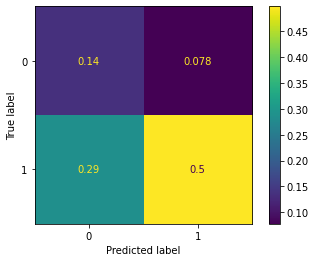

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred,normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## Decision tree

In [ ]:
## instanciação do objeto e treinamento do modelo Decision Tree
dt = DecisionTreeClassifier(max_depth=3).fit(x_resampled, y_resampled.squeeze())
# predição do modelo
y_pred = dt.predict(x_test)
metricas(dt)

Acuracidade (treino):  0.6701197308829018
Acuracidade (teste):  0.6665725246534397
Revocação:  0.6545780969479353
Precisão:  0.8929344054859382
F1_score:  0.7553997824548075


In [ ]:
## instanciação do objeto e treinamento do modelo Decision Tree
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train.squeeze())
# predição do modelo
y_pred = dt.predict(x_test)
metricas(dt)

Acuracidade (treino):  0.7936634422376663
Acuracidade (teste):  0.793311209960225
Revocação:  0.9173548773189707
Precisão:  0.835868913244997
F1_score:  0.8747182515906302


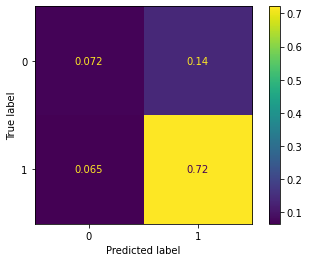

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## Naive Bayes

In [ ]:
## instanciação do objeto e treinamento do modelo Multinomial Naive Bayes
nb = MultinomialNB().fit(x_resampled, y_resampled.squeeze())
# predição do modelo
y_pred = nb.predict(x_test)
metricas(nb)

Acuracidade (treino):  0.7532252695710063
Acuracidade (teste):  0.7526653957494881
Revocação:  0.8586175942549371
Precisão:  0.8322457147829113
F1_score:  0.8452259974373701


In [ ]:
## instanciação do objeto e treinamento do modelo Multinomial Naive Bayes
nb = MultinomialNB().fit(x_train, y_train.squeeze())
# predição do modelo
y_pred = nb.predict(x_test)
metricas(nb)

Acuracidade (treino):  0.7580064354088704
Acuracidade (teste):  0.7587140200993199
Revocação:  0.8715140634350689
Precisão:  0.8301789989738912
F1_score:  0.8503445054303399


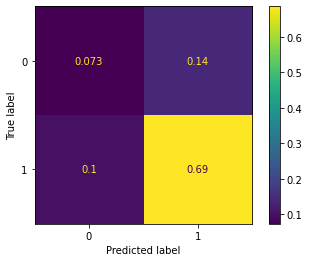

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## Random forest

In [ ]:
## instanciação do objeto e treinamento do modelo Random Forest Sem Balanceamento
rf = RandomForestClassifier(max_depth=2, random_state=23).fit(x_train, y_train.squeeze())
# predição do modelo
y_pred = rf.predict(x_test)
metricas(rf)

Acuracidade (treino):  0.787016209564349
Acuracidade (teste):  0.7865565205111912
Revocação:  1.0
Precisão:  0.7865565205111912
F1_score:  0.8805280006323362


In [ ]:
## instanciação do objeto e treinamento do modelo Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=23).fit(x_resampled, y_resampled.squeeze())
# predição do modelo
y_pred = rf.predict(x_test)
metricas(rf)

Acuracidade (treino):  0.6642390986392842
Acuracidade (teste):  0.6637247287533244
Revocação:  0.6547277079593058
Precisão:  0.8883881445391799
F1_score:  0.7538673557278207


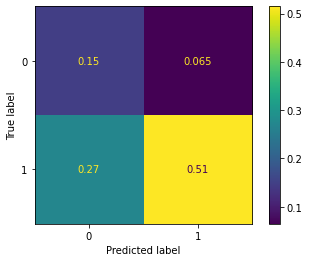

In [ ]:
# definição das variáveis utilizadas na matriz de confusão Sem balanceamento
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

## Regressão logística

In [ ]:
## instanciação do objeto e treinamento do modelo de Regressão Logística 
rl = LogisticRegression().fit(x_resampled, y_resampled.squeeze())
# predição do modelo
y_pred = rl.predict(x_test)
metricas(rl)

Acuracidade (treino):  0.737257789568182
Acuracidade (teste):  0.7347313422297536
Revocação:  0.7930281268701377
Precisão:  0.8588974948958097
F1_score:  0.8246495636075112


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
## instanciação do objeto e treinamento do modelo de Regressão Logística Sem balanceamento 
rl = LogisticRegression().fit(x_train, y_train.squeeze())
# predição do modelo
y_pred = rl.predict(x_test)
metricas(rl)

Acuracidade (treino):  0.7962154147207456
Acuracidade (teste):  0.7956882957942055
Revocação:  0.9733393177737881
Precisão:  0.8067908430268608
F1_score:  0.8822739662864969


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


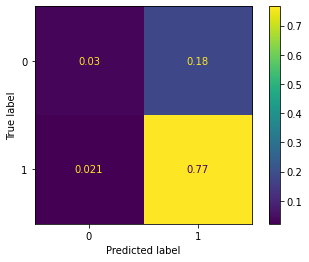

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## Support Vector Machines - SVM

In [ ]:
## instanciação do objeto e treinamento do modelo SVM
svm = SVC().fit(x_resampled, y_resampled)
# predição do modelo
y_pred = svm.predict(x_test)
metricas(svm)

Acuracidade (treino):  0.7100434743138422
Acuracidade (teste):  0.7095718891948505
Revocação:  0.735966487133453
Precisão:  0.8749288560045532
F1_score:  0.7994539426639797


In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()
plt.show()

NameError: ignored

In [ ]:
## instanciação do objeto e treinamento do modelo SVM Sem balanceamento
svm = SVC().fit(x_train, y_train)
# predição do modelo
y_pred = svm.predict(x_test)
metricas(svm)

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

## AdaBoost

In [ ]:
# instanciação do objeto e treinamento do modelo Ada Boost # Sem balanceamento
ab = AdaBoostClassifier().fit(x_train, y_train)
# predição do modelo
y_pred = ab.predict(x_test)
metricas(ab)

In [ ]:
# instanciação do objeto e treinamento do modelo Ada Boost
ab = AdaBoostClassifier().fit(x_resampled, y_resampled)
# predição do modelo
y_pred = ab.predict(x_test)
metricas(ab)

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()
plt.show()

In [ ]:
ab.feature_importances_

In [ ]:
feats = pd.DataFrame(index=x.columns,data=ab.feature_importances_,columns=['Importance'])

In [ ]:
feats

In [ ]:
imp_feats = feats[feats['Importance']>0]

In [ ]:
imp_feats

In [ ]:
imp_feats = imp_feats.sort_values("Importance")

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

## Extra Trees

In [ ]:
# instanciação do objeto e treinamento do modelo Extra Trees
et = ExtraTreesClassifier().fit(x_train, y_train)
# predição do modelo
y_pred = et.predict(x_test)
metricas(et)

In [ ]:
# definição das variáveis utilizadas na matriz de confusão 
y_true = y_test
cm = confusion_matrix(y_true, y_pred, normalize='all')
# matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()